# BGD

In [13]:
import numpy as np
import pandas as pd
import pylab
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from IPython.display import Image
from IPython.core.display import HTML 

**Cost Function**

<img src="http://www.zhihu.com/equation?tex=J%28%5Ctheta+%29+%3D+%5Cfrac%7B1%7D%7B%7B2m%7D%7D%5Csum%5Climits_%7Bi+-+1%7D%5Em+%7B%28%7Bh_%5Ctheta+%7D%28%7Bx%5E%7B%28i%29%7D%7D%29%7D+-+%7By%5E%7B%28i%29%7D%7D%7B%29%
5E2%7D">

In [16]:
def compute_cost_function(m, t0, t1, x, y):
    return 1/2/m * sum([(t0 + t1* np.asarray([x[i]]) - y[i])**2 for i in range(m)])

**Update t1**

更新要拟合的方程
t1 = t1 - learning rate * 偏导数. 如果偏导数>0， 则说明这个点比之前的高，则要减去这个偏导数。用所有参数组合起来使得cost function最低，

<img src="http://www.zhihu.com/equation?tex=%7B%5Ctheta+_j%7D+%5Cleftarrow+%7B%5Ctheta+_j%7D+-+%5Ceta+%5Cfrac%7B1%7D%7Bm%7D%5Csum%5Climits_%7Bi+%3D+1%7D%5Em+%7B%28%7Bh_%5Ctheta+%7D%28%7Bx%5E%7B%28i%29%7D%7D%29+-+%7By%5E%7B%28i%29%7D%7D%29%7Bx_j%7D%5E%7B%28i%29%7D%7D+">

In [28]:
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=1500):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    t0 = 0
    t1 = 0
    # 求全体样本误差, J(theta)
    compute_cost_function(m, t0, t1, x, y)
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*np.asarray([x[i]]) - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*np.asarray([x[i]]) - y[i]) * np.asarray([x[i]]) for i in range(m)])

        # update the parameter
        t0 = t0 - alpha * grad0
        t1 = t1 - alpha * grad1
    
        # mean squared error
        compute_cost_function(m, t0, t1, x, y)

        iter += 1  # update iter
    
        if iter == max_iter:
            print ('Max interactions exceeded!')
            converged = True

    return t0,t1

def plot_cost_function(x, y, m):  
    t0 = list(range(0, x.shape[0]))
    j_values = []
    for i in range(len(t0)):
        j_values.append(compute_cost_function(m, i, i, x, y)[0])
    print ('j_values', len(j_values), len(x), len(y))
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    # x,y,cost的三维图像
    ax.plot(x, y, j_values, label='parametric curve')
    ax.legend()
    plt.show()


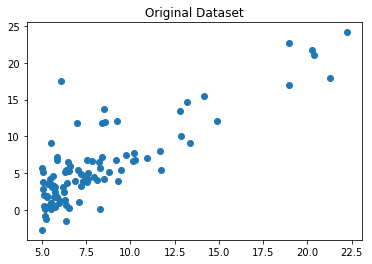

In [21]:
df = pd.read_csv('data.txt', names=['x','y'])
x = df['x']
y = df['y']
pylab.plot(df['x'], df['y'],'o')
pylab.title('Original Dataset')
pylab.show()

In [27]:
print('Length of original data = ' + str(len(df)))

Length of original data = 97


Max interactions exceeded!
theta0 = [-3.63029144] theta1 = [1.16636235]
j_values 97 97 97


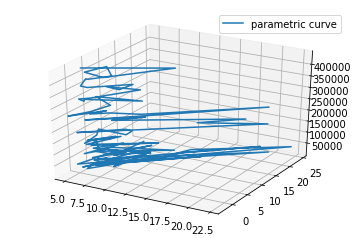

In [29]:
alpha = 0.01 # 学习率
ep = 0.01 # 收敛标准

theta0, theta1 = gradient_descent(alpha, x, y, ep, max_iter=1500)
print ('theta0 = ' + str(theta0)+' theta1 = '+str(theta1)) #打印拟合的参数值
plot_cost_function(x, y, x.shape[0])

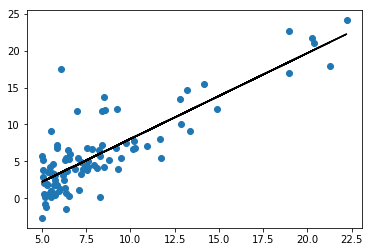

Done!


In [30]:
for i in range(x.shape[0]):
    y_predict = theta0 + theta1 * x 

pylab.plot(x,y,'o')
# predicted line with predited function
pylab.plot(x,y_predict,'k-')
pylab.show()
print ("Done!")

# SBD

在SGD中，遵循“一样本，一迭代”的策略。先随机挑选一个样本（有点任性哦），然后根据单个样本的误差来调节权值，通过一系列的单样本权值调整

<img src="http://www.zhihu.com/equation?tex=%5CDelta+%7Bw_i%7D+%3D+%5Ceta+%28t+-+o%29%7Bx_i%7D">

其中，t,o, x_i 分别为目标值、实际输出值和第i个训练样本的输入。从表面上看来，上式（9-13）和前文提到的公式（9-9）非常类似，但请注意，公式（9-13）少了一个误差求和 的步骤。


<img src="http://www.zhihu.com/equation?tex=%7Bw_i%7D+%5Cleftarrow+%7Bw_i%7D+%2B+%5CDelta+%7Bw_i%7D">

这种简化带来了很多便利。比如，对于一个具有数百万样本的训练集合，**完成一次样本遍历就能对权值更新数百万次**，效率大大提升。反观BGD，可能要遍历数百万样本后，才更新一次权值。

<img src="https://pic4.zhimg.com/80/v2-2d7eb696be0011c08a1a6ad73a366c0f_hd.jpg">

BGD（实线曲线）以批量样本误差之和的均值，作为纠偏向导，所以是一路“稳健”地向着最低点前进的。

对比而言，SGD（虚线曲线）以单个样本的误差为纠偏向导，所以它明显“躁动”了许多，蹦蹦跳跳、前前后后，但总体上仍然是向最低点逼近

但是有时候，这种随机性并非完全是坏事，特别是在探寻损失函数的极小值时。我们知道，如果损失函数的目标函数是一个“凸函数”，它的**极小值存在且唯一**，沿着梯度反方向，就能找到全局唯一的最小值。然而对于“非凸函数”来说，就没那么简单了，它可能存在许多局部最小值。对于BGD而言，一旦陷入局部最小值，基于算法本身的策略，它很难“逃逸”而出。对于局部最小值点而言，左退一步、右进一点，函数值都比自己大，所以就认为自己是最小值。而SGD先天带来的随机性，反而有助于逃逸出某些糟糕的局部最小值，从而获得一个性能更佳的模型。

**SGD虽然失去了权值调整的稳定性，但却带来了求全局极小值的可能性。**

# Mini-batch Gradient Descent

mini-batch Gradient Descent的方法是在上述两个方法中取折衷, 每次从所有训练数据中取一个子集（mini-batch） 用于计算梯度：不仅计算效率高，而且收敛较为稳定，是目前深度学训练中的主流方法

# Challenge

上述三个方法面临的主要挑战如下：

- 选择适当的学习率α 较为困难。太小的学习率会导致收敛缓慢，而学习速度太块会造成较大波动，妨碍收敛。
- 目前可采用的方法是在训练过程中调整学习率大小，例如模拟退火算法：预先定义一个迭代次数m，每执行完m次训练便减小学习率，或者当cost function的值低于一个阈值时减小学习率。然而迭代次数和阈值必须事先定义，因此无法适应数据集的特点。
- 上述方法中, 每个参数的 learning rate 都是相同的，这种做法是不合理的：如果训练数据是**稀疏**的，并且不同特征的出现频率差异较大，那么比较合理的做法是对于出现**频率低的特征设置较大的学习速率，对于出现频率较大的特征数据设置较小的学习速率**。
- 近期的的研究表明，深层神经网络之所以比较难训练，并不是因为容易进入local minimum。相反，由于网络结构非常复杂，在绝大多数情况下即使是 local minimum 也可以得到非常好的结果。而之所以难训练是因为学习过程容易陷入到**马鞍面**中，即在坡面上，一部分点是上升的，一部分点是下降的。而这种情况比较容易出现在平坦区域，在这种区域中，所有方向的梯度值都几乎是 0。
